In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from calculationTools import *


# Data

In [27]:
inputs = (
    np.array(
        [
            100,
            200,
            300,
            400,
            500,
            600,
            700,
            800,
            900,
            1000,
            1500,
            2000,
            2500,
            3000,
            3500,
        ]
    )
    / 1000
)
preamp = (
    np.array(
        [
            83.3,
            165,
            249,
            320,
            400,
            475,
            555,
            605,
            698,
            783,
            1170,
            1600,
            1980,
            2330,
            2640,
        ]
    )
    / 1000
)
shaper_1 = np.array([2.46, 4.30])
shaper_2 = (
    np.array([223, 448, 666, 896, 1100, 1320, 0, 0, 0, 2200, 3280, 4360, 5310, 0, 0])
    / 1000
)

# Preamp Calibration (PREAMP-1)

0.7752055851003359 V/V


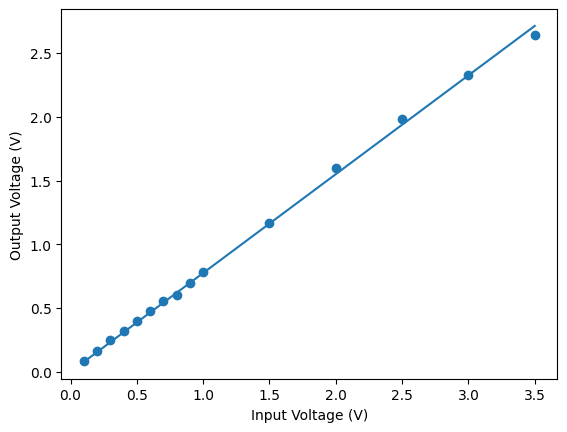

In [28]:
plt.scatter(inputs, preamp)
plt.xlabel("Input Voltage (V)")
plt.ylabel("Output Voltage (V)")
a, cov = curve_fit(fit, inputs, preamp)
plt.plot(inputs, fit(inputs, *a))
print(f"{a[0]} V/V")

0.775 V/pC


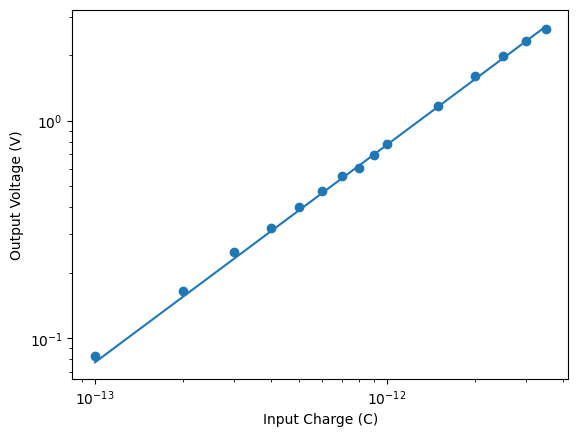

In [29]:
charges = voltsToCharge(inputs)

plt.scatter(charges, preamp)
plt.xlabel("Input Charge (C)")
plt.ylabel("Output Voltage (V)")
plt.loglog()
a, cov = curve_fit(fit, charges, preamp, p0=[1/1.5e-12])
plt.plot(charges, fit(charges, *a))
print(f"{a[0]*1e-12 :.3g} V/pC")

1.24e-19 V/electron


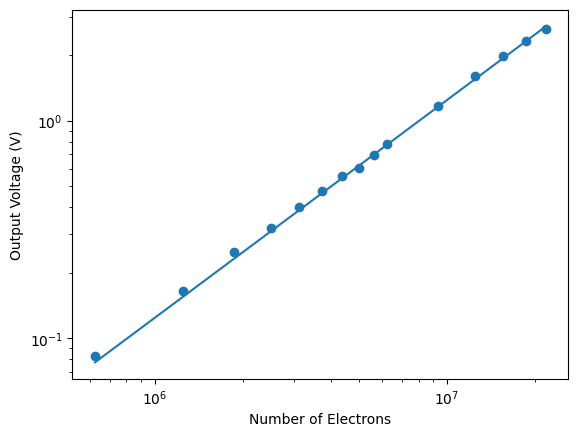

In [30]:
nElectrons = chargeToElectron(charges)

plt.scatter(nElectrons, preamp)
plt.xlabel("Number of Electrons")
plt.ylabel("Output Voltage (V)")
plt.loglog()
a, cov = curve_fit(fit, nElectrons, preamp, p0=[1/1.5e-12])
plt.plot(nElectrons, fit(nElectrons, *a))
print(f"{a[0]*1e-12 :.3g} V/electron")

# Shaper 

In [38]:

inputs_c2 = np.array([x for i, x in enumerate(inputs) if shaper_2[i] != 0])
shaper_c2 = np.array([x for i, x in enumerate(shaper_2) if shaper_2[i] != 0])


2.160104094466162 V/V


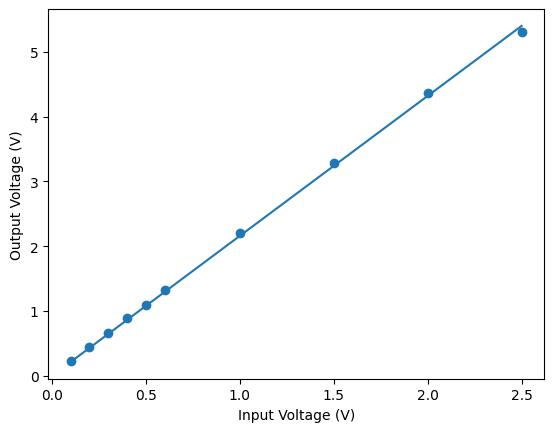

In [37]:
plt.scatter(inputs_c2, shaper_c2)
plt.xlabel("Input Voltage (V)")
plt.ylabel("Output Voltage (V)")
a, cov = curve_fit(fit, inputs_c2, shaper_c2)
plt.plot(inputs_c2, fit(inputs_c2, *a))
print(f"{a[0]} V/V")

2.16 V/pC


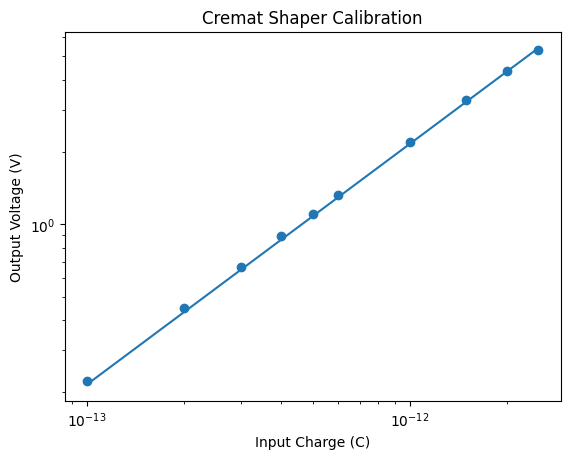

In [41]:
charges = voltsToCharge(inputs_c2)

plt.title("Cremat Shaper Calibration")
plt.scatter(charges, shaper_c2)
plt.xlabel("Input Charge (C)")
plt.ylabel("Output Voltage (V)")
plt.loglog()
a, cov = curve_fit(fit, charges, shaper_c2, p0=[1/1.5e-12])
plt.plot(charges, fit(charges, *a))
print(f"{a[0]*1e-12 :.3g} V/pC")

3.46e-19 V/electron


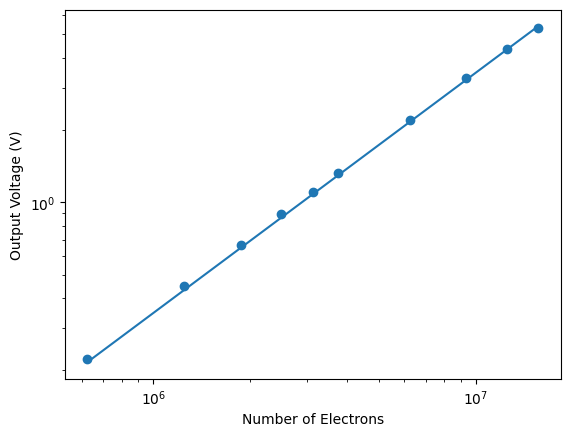

In [40]:
nElectrons = chargeToElectron(charges)

plt.scatter(nElectrons, shaper_c2)
plt.xlabel("Number of Electrons")
plt.ylabel("Output Voltage (V)")
plt.loglog()
a, cov = curve_fit(fit, nElectrons, shaper_c2, p0=[1/1.5e-12])
plt.plot(nElectrons, fit(nElectrons, *a))
print(f"{a[0]*1e-12 :.3g} V/electron")